In [24]:
import matplotlib.pyplot as plt
import numpy as np
import requests


In [42]:
# need to set a custom header, or else the api rejects it (see chatgpt convo)
headers = {
    "User-Agent": "QP_to_TL-regression-project"
}
# create lists for np.array()
tl_list = []
qp_list = [[], [], []]  # 3 lists for apm, pps and vs respectively

# sample a person every 50 TR
for i in range(25000, 0, -50):
    request_url = f"https://ch.tetr.io/api/users/by/league?limit=1&after={i}:0:0"
    
    response = requests.get(request_url, headers=headers)
    user_id = response.json()['data']['entries'][0]['_id']
    
    qp_info_url = f"https://ch.tetr.io/api/users/{user_id}/summaries/zenith"
    tl_info_url = f"https://ch.tetr.io/api/users/{user_id}/summaries/league"
    qp_response = requests.get(qp_info_url, headers=headers)
    tl_response = requests.get(tl_info_url, headers=headers)
    
    # if unsuccessful, skip user
    if qp_response.json()['success'] == False:
        continue
    if tl_response.json()['success'] == False:
        continue

    # more failure points to check for qp: record may be null
    # this guy is causing some problems - unranked: 687ef53580151ad0b6efddfd / floorrotting
    if qp_response.json()['data']['record'] is None:
        continue
    
    # define relevant metrics
    # qp: apm, pps and VS of weekly best run (cant access average performance data readily) 
    qp_metric_aggr = qp_response.json()['data']['record']['results']['aggregatestats']
    # tl_metric_vs = tl_response.json()['data']['vs']  # varies too much, and is opponent dependent
    tl_metric = tl_response.json()['data']['tr']
    
    # print(f"qp: {qp_metric_vs}, tl: {tl_metric_vs}")
    if qp_metric_vs > 0 and tl_metric > 0:
        tl_list.append(tl_metric)
        qp_list[0].append(qp_metric_aggr['apm'])
        qp_list[1].append(qp_metric_aggr['pps'])
        qp_list[2].append(qp_metric_aggr['vsscore'])


apm: 223.12463655747237
apm: 223.12463655747237
apm: 223.12463655747237
apm: 223.12463655747237
apm: 223.12463655747237
apm: 182.03499169191673
apm: 162.2834438633907
apm: 189.8940103524772
apm: 93.11859443631039
apm: 130.78227173649793
apm: 153.38503093142808
apm: 164.7214854111406
apm: 123.27783219066275
apm: 132.54019292604502
apm: 131.05438401775805
apm: 92.95774647887325
apm: 132.1666604609599
apm: 235.0424197713021
apm: 94.77100613054454
apm: 110.20408163265306
apm: 134.23203786031837
apm: 135
apm: 138.2159858125136
apm: 0
apm: 96.9672046879819
apm: 112.49588349372462
apm: 105.29907239577781
apm: 128.5158716968589
apm: 124.89989185397364
apm: 98.79124469127736
apm: 203.60379127174252
apm: 56.0865353567969
apm: 103.74953761307461
apm: 106.81897332311765
apm: 77.9134295227525
apm: 83.25309491059147
apm: 102.72688898269311
apm: 100.48728813559322
apm: 56.859580355084155
apm: 115.63855767849446
apm: 84.98392282958199
apm: 72.43727378688425
apm: 82.27009113504556
apm: 61.8826739427012

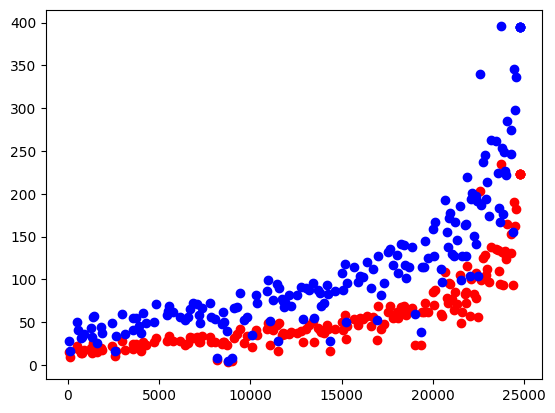

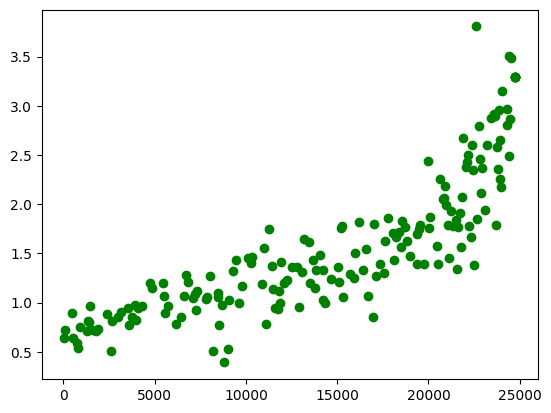

In [43]:
x_data = np.array(tl_list)
y_data = np.array(qp_list)

plt.plot(x_data, y_data[0], 'ro',
         # x_data, y_data[1], 'go',
         x_data, y_data[2], 'bo')
plt.show()

plt.plot(# x_data, y_data[0], 'ro',
         x_data, y_data[1], 'go')
         # x_data, y_data[2], 'bo')
plt.show()

In [41]:
# so all 3 quantities 

# useful read
# https://blog.minitab.com/en/blog/adventures-in-statistics-2/how-to-identify-the-most-important-predictor-variables-in-regression-models